# Autocorrelation Function(ACF)

In [ ]:
t = 0:300

In [ ]:
y_stationary = rnorm(length(t),mean = 1,sd = 1)

In [ ]:
y_trend = cumsum(rnorm(length(t),mean = 1,sd = 4))+t/100

In [ ]:
y_stationary = y_stationary/max(y_stationary)

In [ ]:
y_trend = y_trend/max(y_trend)

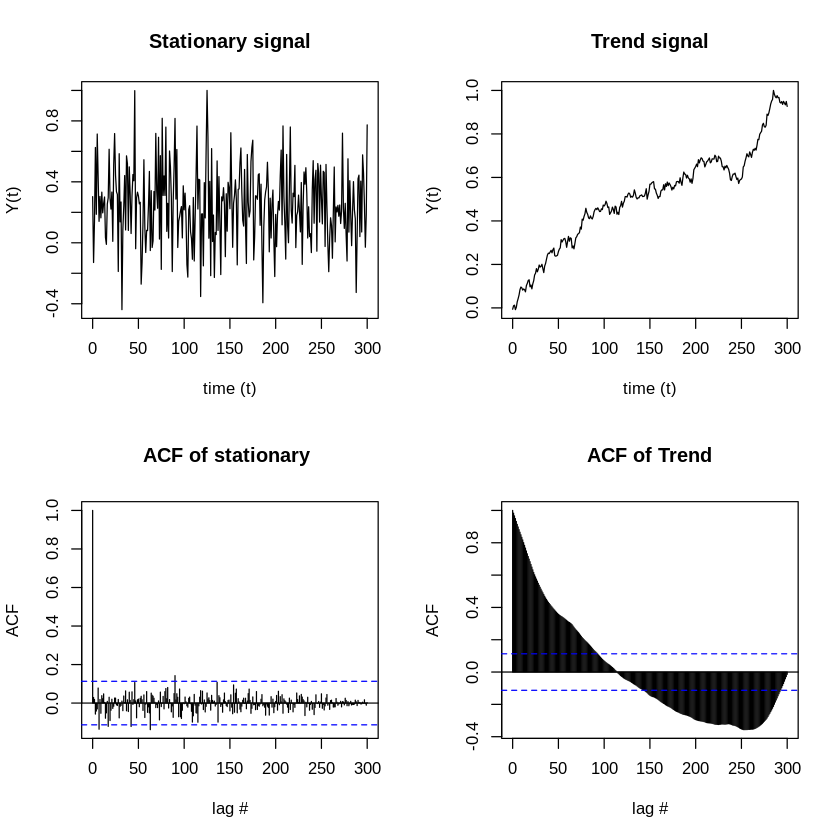

In [ ]:
plot.new()
frame()
par(mfcol=c(2,2))
plot(t,y_stationary,type = "l",xlab = "time (t)",ylab = "Y(t)",main = "Stationary signal")
acf(y_stationary,lag.max = length(y_stationary),xlab = "lag #",ylab = "ACF",main = "ACF of stationary ")
plot(t,y_trend,type="l",xlab = "time (t)",ylab = "Y(t)",main = "Trend signal")
acf(y_trend,lag.max = length(y_stationary),xlab = "lag #",ylab = "ACF",main = "ACF of Trend")

# Augmented Dickey–Fuller test(ADF)

In [ ]:
install.packages("tseries")
library(tseries)
adf.test(y_stationary)
#H0 rejected as data is stationary as the p-value is lesser than 0.05

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(y_stationary):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  y_stationary
Dickey-Fuller = -7.345, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
adf.test(y_trend)
#H0 is accepted as data is not stationary as the p-value is more than 0.05


	Augmented Dickey-Fuller Test

data:  y_trend
Dickey-Fuller = -2.4506, Lag order = 6, p-value = 0.3864
alternative hypothesis: stationary


# Kwiatkowski–Phillips–Schmidt–Shin(KPSS) for level or trend stationarity

In [ ]:
kpss.test(y_stationary,null="Trend")
# Data is greater than 0.05 hence it is stationary

Warning message in kpss.test(y_stationary, null = "Trend"):
“p-value greater than printed p-value”



	KPSS Test for Trend Stationarity

data:  y_stationary
KPSS Trend = 0.022074, Truncation lag parameter = 5, p-value = 0.1


In [ ]:
kpss.test(y_trend,null="Trend")
# Data is lesser than 0.05 hence it is not stationary

Warning message in kpss.test(y_trend, null = "Trend"):
“p-value smaller than printed p-value”



	KPSS Test for Trend Stationarity

data:  y_trend
KPSS Trend = 0.45989, Truncation lag parameter = 5, p-value = 0.01


# Ljung Box Test

In [ ]:
lag.length = 25
Box.test(y_stationary,lag=lag.length,type="Ljung-Box")
#P-value greater than significance level(0.05): The null hypothesis cannot be rejected, and there is no evidence of autocorrelation.


	Box-Ljung test

data:  y_stationary
X-squared = 23.837, df = 25, p-value = 0.5288


In [ ]:
lag.length = 25
Box.test(y_trend,lag=lag.length,type="Ljung-Box")
#P-value less than significance level(0.05): The null hypothesis is rejected, and there is evidence of autocorrelation.


	Box-Ljung test

data:  y_trend
X-squared = 4930.5, df = 25, p-value < 2.2e-16
